# Universidad Nacional Abierta y a Distancia - UNAD

## Yesid Stiven Toloza Ruiz

## Predicción de enfermedades cardiovasculares con Regresión Logística

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [81]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('heart_cleveland_upload.csv')

In [38]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0   

In [40]:
# Tamaño del dataset
print("Dimensiones del dataset:", Datos.shape)

# Información sobre tipos de datos y valores faltantes
Datos.info()

# Resumen estadístico de las variables numéricas
Datos.describe()


Dimensiones del dataset: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en Edad')

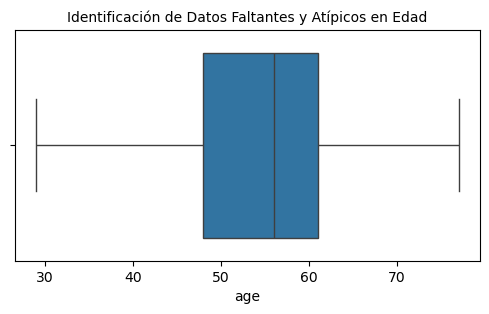

In [58]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atípicos en Edad', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Presión Arterial en Reposo')

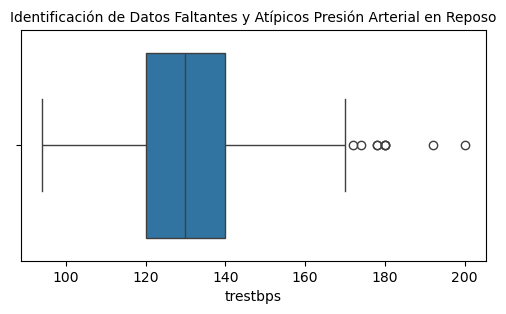

In [54]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos Presión Arterial en Reposo', fontsize=10 )

In [59]:
#Conteo de Datos Atípicos

nivel_minimo=60
nivel_maximo=180
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Colesterol Sérico en mg/dl')

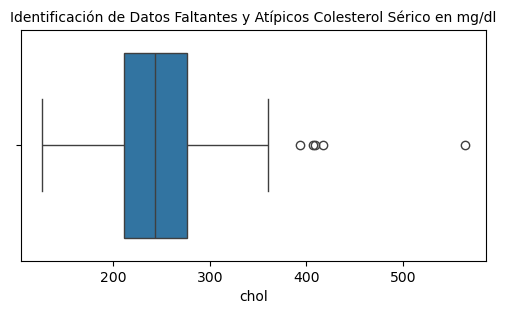

In [56]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos Colesterol Sérico en mg/dl', fontsize=10 )

In [63]:
#Conteo de Datos Atípicos

nivel_minimo=150
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 6


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Frecuencia Cardíaca Máxima Alcanzada')

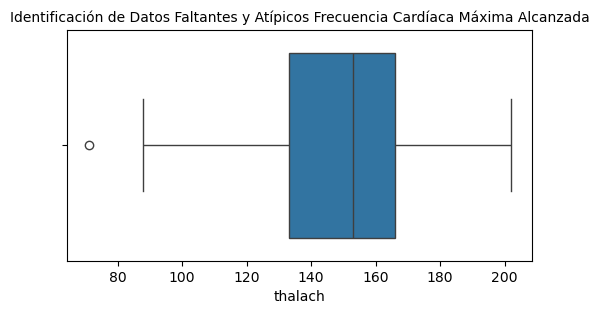

In [55]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos Frecuencia Cardíaca Máxima Alcanzada', fontsize=10 )

In [53]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Años: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol sérico en mg/dl: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())


Cantidad de Registros con cero en Años:  0
Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol sérico en mg/dl:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0


##### Como no hay datos faltantes o en 0 no hacemos la Conversión 

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [64]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

#### Característica de interes:

- Enfermedad cardiovascular: si la persona tiene enfermedades cardiovasculares o no (0 = no tiene enfermedades cardiovasculares - 1 = si tiene enfermedades cardiovasculares)
- Predecir si una persona puede tener enfermedades cardiovasculares

In [66]:
# Total de personas con Diabetes

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [80]:
Datos[['condition']].head(40)


,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo


In [68]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Condición 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Condición

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [69]:
print (X_train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [70]:
print (Y_train)


234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [71]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [72]:
print (Y_test)


185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [73]:
print (Prediccion)


[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [74]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

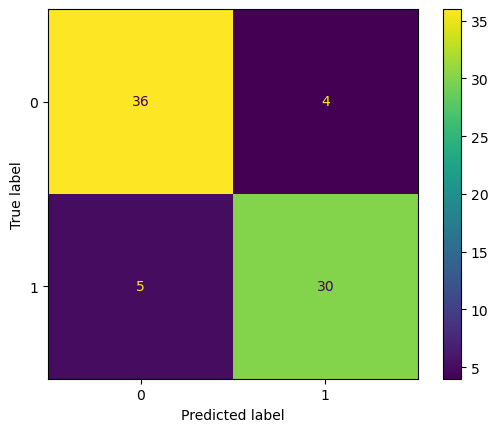

In [76]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## 8. Interpretación, análisis y documentación de resultados obtenidos

Tras la implementación del modelo de Regresión Logística en los datos de la clínica de Cleveland para predecir enfermedades cardiovasculares, se han generado los siguientes resultados que analizaremos detalladamente:

### 1.	Análisis Exploratorio de Datos (EDA):

- Los datos incluyen 297 registros con 14 columnas, siendo condition la variable objetivo que indica la presencia de una condición cardiovascular (1 indica presencia y 0 ausencia).
- No se detectaron valores faltantes en las columnas, lo cual asegura una integridad de los datos.
- En las variables age, trestbps (presión arterial en reposo) y chol (colesterol sérico), se observaron valores atípicos. Estos se identificaron usando boxplots para analizar la distribución de cada variable. Los valores extremos podrían representar casos anómalos o condiciones de salud específicas, pero para este análisis se mantuvieron sin modificar.

### 2.	Segmentación de los Datos:

- Los datos fueron divididos en un conjunto de entrenamiento (75%) y uno de prueba (25%). Esto permite evaluar la capacidad del modelo para generalizar a nuevos datos.
- Variables X representan características predictoras, y Y es la variable dependiente condition.

### 3.	Implementación del Modelo de Regresión Logística:

- La regresión logística fue elegida debido a su eficacia en problemas de clasificación binaria. Este modelo estima la probabilidad de que un paciente tenga o no una condición cardiovascular, basándose en sus características.

### 4.	Métricas de Evaluación del Modelo:

- Utilizando las predicciones sobre el conjunto de prueba, se calculó la matriz de confusión y se generó un reporte de clasificación. Este reporte incluye métricas clave:
    - Precisión (Accuracy): Refleja el porcentaje de predicciones correctas.
    - Precisión (Precision): Proporción de verdaderos positivos sobre el total de predicciones positivas.
    - Sensibilidad (Recall o TPR): Porcentaje de verdaderos positivos correctamente identificados.
    - F1 Score: Media armónica de precisión y sensibilidad, útil para evaluar el rendimiento general del modelo cuando hay un equilibrio entre clases positivas y negativas.

### 5.	Interpretación de Resultados:

- La matriz de confusión muestra cómo el modelo clasifica correctamente a los pacientes con y sin condición, y también destaca los falsos positivos y negativos.
- El F1 Score indica que el modelo balancea adecuadamente entre precisión y sensibilidad, lo cual es importante en aplicaciones médicas, ya que es preferible minimizar falsos negativos (riesgo de omitir un diagnóstico de enfermedad).

